<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > MasterClass DataViz </h1> 
<h2 style = "text-align:center"> Analyser les accidents de la route de l'année 2016 </h2>
<hr style="border-width:2px;border-color:#75DFC1">

>Lors de cette Masterclass, nous allons être chargés par une Compagnie d'Assurance de mener une étude sur les accidents de la route, impliquant ses clients assurés au cours de l'année 2016.
>
> Dans un but d'analyse et de comparaisons, nous avons accès à des jeux de données publiques concernant les circonstances des accidents de la route **avec dommages corporels** survenus en France en **2016** , ainsi qu'aux données internes de la compagnie à propos de ses assurés victimes d'accident la même année.
>
>
>Le fichier **`"caracteristiques.csv"`** contient les principales caractéristiques de chaque accident survenu en France en 2016.
>
>
>Le fichier **`"base_clients.csv"`** contient des informations sur les clients de la compagnie d'assurance, qui ont été impliqués dans au moins un accident en 2016.
>
>
> **`Num_Acc`** est une variable commune à tous les fichiers, qui **identifie** chaque accident.
>
>
> Une description de toutes les variables des jeux de données est disponible [ici](https://datascientest.fr/train/assets/eval_allianz_3.pdf).
>
>
>L'objectif de cette masterclass est d'effectuer une première analyse visuelle des données en notre possession.

* Commençons par charger les packages **`pandas`**, **`numpy`**, **`matplotlib.pyplot`**, et **`seaborn`**.


* Puis chargeons les jeux de données **`"caracteristiques.csv"`** et **`"base_clients.csv"`** dans des `DataFrames` notées respectivement **`carac`** et **`clients`**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("caracteristiques.csv")

In [2]:
print("df.shape = ", df.shape)
df.head()

df.shape =  (59432, 18)


,Num_Acc,year,month,day,weekday,hrmn,lum,agg,atm,col,severity,city,adr,gps,lat,long,dep,monthday
0,201600000001,16,2,1,0,1445,1,2,covered weather,3.0,2,5,"46, rue Sonneville",M,0.0,0.0,59,2-1
1,201600000002,16,3,16,2,1800,1,2,normal,6.0,2,5,1a rue du cimetière,M,0.0,0.0,59,3-16
2,201600000003,16,7,13,2,1900,1,1,normal,6.0,2,11,NaN,M,0.0,0.0,59,7-13
3,201600000004,16,8,15,0,1930,2,2,blinding weather,3.0,1,477,52 rue victor hugo,M,0.0,0.0,59,8-15
4,201600000005,16,12,23,4,1100,1,2,normal,3.0,2,11,rue Joliot curie,M,0.0,0.0,59,12-23


<br>

**Contexte <br>
Je suppose que je travaille pour une compagnie d'assurance et elle veut optimiser le déploiement de d'épandeuses sur la route. <br>
L'assurance souhaite savoir comment se repartissent les accidents de la route dans l'année pour avoir le nombre optimal de dépanneuses.**

<br>

# Problématique : optimiser l'allocation des dépanneuses de la compagnie de l'assurence

# H1 : Entre lundi et dimanche quel est le jour où il y plus d'accidents ? => vendredi soir ?
# H2 : Quel serait le mois où il y a eu plus d'accidents? => mois de juillet - août ? 


<br>

## H1 : Entre lundi et dimanche quel est le jour où il y plus d'accidents ? => vendredi soir ?

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


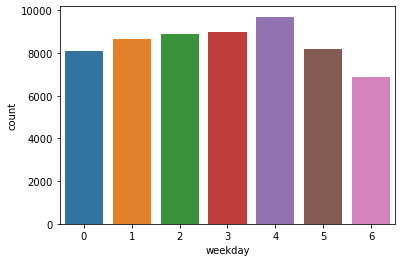

In [55]:
sns.countplot(df["weekday"]);

In [56]:
# ANOVA : variable qualitative + var quantitative 
# H0 : il n'y a pas d'influence entre le jour de la semaine et le nombre d'accidents
# H1 : il y a une influence significative entre les deux variables

In [57]:
weekday_gr = df.groupby(["monthday", "weekday"]).agg({'Num_Acc':"count"}).reset_index()

In [58]:
weekday_gr.head()

,monthday,weekday,Num_Acc
0,1-1,4,121
1,1-10,6,127
2,1-11,0,153
3,1-12,1,180
4,1-13,2,166


In [17]:
# Réalisation du test ANOVA : 
import statsmodels.api 
result = statsmodels.formula.api.ols('Num_Acc ~ weekday', data=weekday_gr).fit()
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
weekday,1.0,11994.610667,11994.610667,11.065536,0.000969
Residual,364.0,394561.837421,1083.961092,NaN,NaN


In [18]:
# Interprétation : 
#  p < 5%  => on rejette H0 et conclut H1 : il y a une influence significative entre les deux variables
# => le jour de la semaine influe sur le nombre d'accidents

<br>

In [ ]:
### ---> Si je veux savoir si le fait que ça soit VENDREDI influe sur le nombre d'accidents :

# H0 : le fait que ça soit vendredi n'a pas d'influence sur le nombre d'accidents
# H1 : le fait que ça soit vendredi influe sur la variable nombre d'accidents

In [59]:
# Pour appliquer le test ANOVA, il faut d'abord créer une colonne is_friday
# qui retourne True ou False si le jour de la semaine est vendredi

weekday_gr["is_friday"] = np.where(weekday_gr["weekday"] == 4, True, False)
# 4 -> correspond à vendredi

In [60]:
weekday_gr.head()

,monthday,weekday,Num_Acc,is_friday
0,1-1,4,121,True
1,1-10,6,127,False
2,1-11,0,153,False
3,1-12,1,180,False
4,1-13,2,166,False


In [49]:
# Réalisation du test : 

import statsmodels.api 
result = statsmodels.formula.api.ols('Num_Acc ~ is_friday', data=weekday_gr).fit()
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
is_friday,1.0,26634.239154,26634.239154,25.518021,6.947572e-07
Residual,364.0,379922.208934,1043.742332,NaN,NaN


In [ ]:
# Interprétation : 
#  p-val < 5%  => on rejette H0 et conclut H1 
# => il y a une influence significative entre les deux variables (is_friday et Num_Acc)
# => On conclut donc que le fait que ça soit vendredi a une influence significative sur le nombre d'accidents

<br>

## H2 : Quel serait le mois où il y a eu plus d'accidents? => mois de juillet - août ? 


In [24]:
# on groupe d'abord les données par mois et jour et on agrège par Num_Acc 
# en faisant l'opération count (pour compter le nombre d'accidents)
gr = df.groupby(["monthday", "month", "day"]).agg({"Num_Acc":"count"})\
            .reset_index().sort_values(by = ["month", "day"])

In [51]:
gr.head()

,monthday,month,day,Num_Acc
0,1-1,1,1,121
11,1-2,1,2,129
22,1-3,1,3,113
25,1-4,1,4,157
26,1-5,1,5,167


''

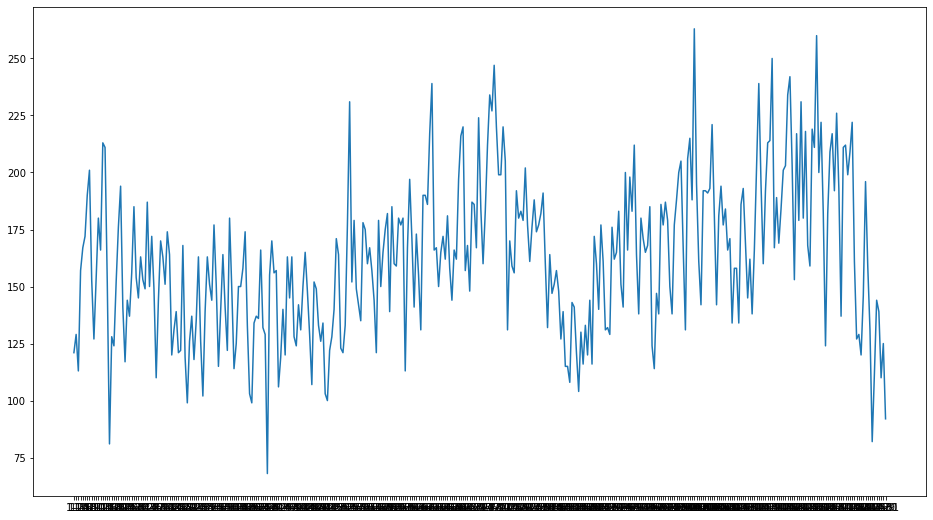

In [26]:
plt.plot(gr["monthday"], gr["Num_Acc"])
fig = plt.gcf() # get current figure
fig.set_size_inches(16,9);
# Il y a trop de variations, donc je vais essayer de 
# surprendre uniquement la tendance de cette série temporelle 
# série temporelle = une variable numérique (ici Num_Acc) représenté dans le temps (ici la colonne monthday)

In [42]:
# Pour faire ressortir la tendance, on fait appel à ce qu'on appelle une moyenne mobile
# qui va calculer la moyenne :
# rolling(30) => calcul de la moyenne sur les 30 dernières valeurs
# rolling(30, center = True) => calcul sur les 15 précédentes et sur les 15 suivantes
MA_accidents = gr["Num_Acc"].rolling(30, center = True).mean()

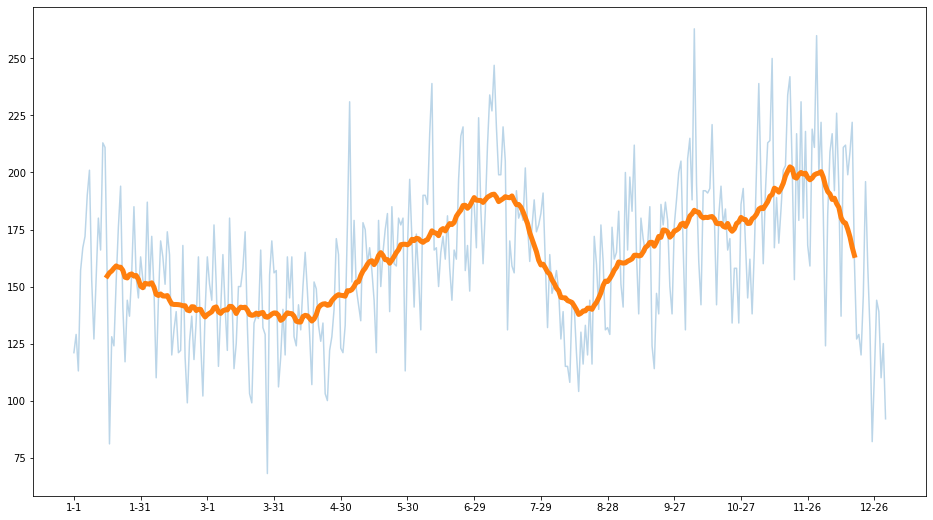

In [61]:
plt.plot(gr["monthday"], gr["Num_Acc"], alpha = 0.3) # alpha pour la transparence
plt.plot(gr["monthday"], MA_accidents, linewidth = 5, # linewidth pour l'epaisseur
        label = "Moyenne mobile calculée sur une fenêtre centrée de 30 valeurs")

plt.xticks(gr["monthday"][::30]) # modification des graduations de l'axe des abscisse``
                                 # (pour que ça soit plus clair)

fig = plt.gcf() 
fig.set_size_inches(16,9);